In [1]:
# * ** args kwargs
# funcs


In [2]:
a = 10_000_000
print(a)

10000000


# refs:
    [docs](https://numpy.org/doc/stable/reference/generated/numpy.broadcast_to.html)
    
    [docs](https://numpy.org/doc/stable/reference/routines.html)
    
    [docs](https://codingdict.com/article/21565)
    
    https://blog.csdn.net/yuechuxuan/article/details/79705340

# numpy基础

In [3]:
import os, sys
import numpy as np

import matplotlib.pyplot as plt

## 基础篇

NumPy的主要对象是**同种元素的多维数组**。这是一个**所有的元素都是一种类型**、通过一个正整数元组索引的元素表格(通常是元素是数字)。在NumPy中**维度(dimensions)叫做轴(axes)，轴的个数叫做秩(rank)**。

例如，在3D空间一个点的坐标[1, 2, 3]是一个秩为1的数组，因为它只有一个轴。那个轴长度为3.又例如，在以下例子中，数组的秩为2(它有两个维度).第一个维度长度为2,第二个维度长度为3.

[[ 1., 0., 0.],
 [ 0., 1., 2.]]

NumPy的数组类被称作ndarray。通常被称作数组。注意numpy.array和标准Python库类array.array并不相同，后者只处理一维数组和提供少量功能。更多重要ndarray对象属性有：

**ndarray.ndim:**
数组轴的个数，在python的世界中，轴的个数被称作秩

**ndarray.shape**
数组的维度。这是一个指示数组在每个维度上大小的整数元组。例如一个n排m列的矩阵，它的shape属性将是(2,3),这个元组的长度显然是秩，即维度或者ndim属性

**ndarray.size**
数组元素的总个数，等于shape属性中元组元素的乘积。

**ndarray.dtype**
一个用来描述数组中元素类型的对象，可以通过创造或指定dtype使用标准Python类型。另外NumPy提供它自己的数据类型。

**ndarray.itemsize**
数组中每个元素的字节大小。例如，一个元素类型为float64的数组itemsiz属性值为8(=64/8),又如，一个元素类型为complex32的数组item属性为4(=32/8).

**ndarray.data**
包含实际数组元素的缓冲区，通常我们不需要使用这个属性，因为我们总是通过索引来使用数组中的元素。

一个例子1
>>> from numpy  import *
>>> a = arange(15).reshape(3, 5)
>>> a
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])
>>> a.shape
(3, 5)
>>> a.ndim
2
>>> a.dtype.name
'int32'
>>> a.itemsize
4
>>> a.size
15
>>> type(a)
numpy.ndarray
>>> b = array([6, 7, 8])
>>> b
array([6, 7, 8])
>>> type(b)
numpy.ndarray

## 创建数组

创建数组
有好几种创建数组的方法。
例如，你可以使用array函数从常规的Python列表和元组创造数组。所创建的数组类型由原序列中的元素类型推导而来。

>>> from numpy  import *
>>> a = array( [2,3,4] )
>>> a
array([2, 3, 4])
>>> a.dtype
dtype('int32')
>>> b = array([1.2, 3.5, 5.1])
>>> b.dtype
dtype('float64')  一个常见的错误包括用多个数值参数调用`array`而不是提供一个由数值组成的列表作为一个参数。

>>> a = array(1,2,3,4)    # WRONG
>>> a = array([1,2,3,4])  # RIGHT

数组将序列包含序列转化成二维的数组，序列包含序列包含序列转化成三维数组等等。

>>> b = array( [ (1.5,2,3), (4,5,6) ] )
>>> b
array([[ 1.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ]])

**数组类型可以在创建时显示指定**

>>> c = array( [ [1,2], [3,4] ], dtype=complex )
>>> c
array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])
通常，数组的元素开始都是未知的，但是它的大小已知。因此，NumPy提供了一些使用占位符创建数组的函数。这最小化了扩展数组的需要和高昂的运算代价。

函数function创建一个全是0的数组，函数ones创建一个全1的数组，函数empty创建一个内容随机并且依赖与内存状态的数组。默认创建的数组类型(dtype)都是float64。

>>> zeros( (3,4) )
array([[0.,  0.,  0.,  0.],
       [0.,  0.,  0.,  0.],
       [0.,  0.,  0.,  0.]])
>>> ones( (2,3,4), dtype=int16 )                # dtype can also be specified
array([[[ 1, 1, 1, 1],
        [ 1, 1, 1, 1],
        [ 1, 1, 1, 1]],
       [[ 1, 1, 1, 1],
        [ 1, 1, 1, 1],
        [ 1, 1, 1, 1]]], dtype=int16)
>>> empty( (2,3) )
array([[  3.73603959e-262,   6.02658058e-154,   6.55490914e-260],
       [  5.30498948e-313,   3.14673309e-307,   1.00000000e+000]])

为了创建一个数列，NumPy提供一个类似arange的函数返回数组而不是列表:

>>> arange( 10, 30, 5 )
array([10, 15, 20, 25])
>>> arange( 0, 2, 0.3 )                 # it accepts float arguments
array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8])

**当arange使用浮点数参数时，由于有限的浮点数精度，通常无法预测获得的元素个数。因此，最好使用函数linspace去接收我们想要的元素个数来代替用range来指定步长。**

其它函数array, zeros, zeros_like, ones, ones_like, empty, empty_like, arange, linspace, rand, randn, fromfunction, fromfile参考：NumPy示例



## 打印数组

打印数组
当你打印一个数组，NumPy以类似嵌套列表的形式显示它，但是呈以下布局：

最后的轴从左到右打印
次后的轴从顶向下打印
剩下的轴从顶向下打印，每个切片通过一个空行与下一个隔开
一维数组被打印成行，二维数组成矩阵，三维数组成矩阵列表。

>>> a = arange(6)                         # 1d array
>>> print a
[0 1 2 3 4 5]
>>>
>>> b = arange(12).reshape(4,3)           # 2d array
>>> print b
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
>>>
>>> c = arange(24).reshape(2,3,4)         # 3d array
>>> print c
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
查看形状操作一节获得有关reshape的更多细节

如果一个数组用来打印太大了，NumPy自动省略中间部分而只打印角落

>>> print arange(10000)
[   0    1    2 ..., 9997 9998 9999]
>>>
>>> print arange(10000).reshape(100,100)
[[   0    1    2 ...,   97   98   99]
 [ 100  101  102 ...,  197  198  199]
 [ 200  201  202 ...,  297  298  299]
 ...,
 [9700 9701 9702 ..., 9797 9798 9799]
 [9800 9801 9802 ..., 9897 9898 9899]
 [9900 9901 9902 ..., 9997 9998 9999]]

**禁用NumPy的这种行为并强制打印整个数组，你可以设置printoptions参数来更改打印选项。**

>>> set_printoptions(threshold='nan')

## 基本运算

**数组的算术运算是按元素的。**新的数组被创建并且被结果填充。

>>> a = array( [20,30,40,50] )
>>> b = arange( 4 )
>>> b
array([0, 1, 2, 3])
>>> c = a-b
>>> c
array([20, 29, 38, 47])
>>> b**2
array([0, 1, 4, 9])
>>> 10*sin(a)
array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])
>>> a<35
array([True, True, False, False], dtype=bool)

不像许多矩阵语言，**NumPy中的乘法运算符*指示按元素计算**，**矩阵乘法可以使用dot函数或创建矩阵对象实现**(参见教程中的矩阵章节)

>>> A = array( [[1,1],
...             [0,1]] )
>>> B = array( [[2,0],
...             [3,4]] )
>>> A*B                         # elementwise product
array([[2, 0],
       [0, 4]])
>>> dot(A,B)                    # matrix product
array([[5, 4],
       [3, 4]])

**有些操作符像+=和*=被用来更改已存在数组而不创建一个新的数组。**

>>> a = ones((2,3), dtype=int)
>>> b = random.random((2,3))
>>> a *= 3
>>> a
array([[3, 3, 3],
       [3, 3, 3]])
>>> b += a
>>> b
array([[ 3.69092703,  3.8324276 ,  3.0114541 ],
       [ 3.18679111,  3.3039349 ,  3.37600289]])
>>> a += b                                  # b is converted to integer type
>>> a
array([[6, 6, 6],
       [6, 6, 6]])

当运算的是不同类型的数组时，结果数组和更普遍和精确的已知(这种行为叫做upcast)。

>>> a = ones(3, dtype=int32)
>>> b = linspace(0,pi,3)
>>> b.dtype.name
'float64'
>>> c = a+b
>>> c
array([ 1.        ,  2.57079633,  4.14159265])
>>> c.dtype.name
'float64'
>>> d = exp(c*1j)
>>> d
array([ 0.54030231+0.84147098j, -0.84147098+0.54030231j,
       -0.54030231-0.84147098j])
>>> d.dtype.name
'complex128' 许多非数组运算，如计算数组所有元素之和，被作为ndarray类的方法实现

>>> a = random.random((2,3))
>>> a
array([[ 0.6903007 ,  0.39168346,  0.16524769],
       [ 0.48819875,  0.77188505,  0.94792155]])
>>> a.sum()
3.4552372100521485
>>> a.min()
0.16524768654743593
>>> a.max()
0.9479215542670073

这些运算默认应用到数组好像它就是一个数字组成的列表，无关数组的形状。然而，**指定axis参数你可以吧运算应用到数组指定的轴上**：

>>> b = arange(12).reshape(3,4)
>>> b
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
>>>
>>> b.sum(axis=0)                            # sum of each column
array([12, 15, 18, 21])
>>>
>>> b.min(axis=1)                            # min of each row
array([0, 4, 8])
>>>
>>> b.cumsum(axis=1)                         # cumulative sum along each row
array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

## 通用函数(ufunc)

NumPy提供常见的数学函数如sin,cos和exp。在NumPy中，这些叫作“通用函数”(ufunc)。在NumPy里这些函数作用按数组的元素运算，产生一个数组作为输出。

>>> B = arange(3)
>>> B
array([0, 1, 2])
>>> exp(B)
array([ 1.        ,  2.71828183,  7.3890561 ])
>>> sqrt(B)
array([ 0.        ,  1.        ,  1.41421356])
>>> C = array([2., -1., 4.])
>>> add(B, C)
array([ 2.,  0.,  6.])

更多函数
all, alltrue, any, apply along axis, argmax, argmin, argsort, average, bincount, 
ceil, clip, conj, conjugate, corrcoef, cov, cross, cumprod, cumsum, diff, dot, 
floor, inner, inv, lexsort, max, maximum, mean, median, min, minimum, nonzero, outer, 
prod, re, round, sometrue, sort, std, sum, trace, transpose, var, vdot, vectorize, where 
参见:[NumPy示例](https://numpy.org/doc/stable/reference/routines.html)

## 索引，切片和迭代

一维数组可以被索引、切片和迭代，就像列表和其它Python序列。

>>> a = arange(10)**3
>>> a
array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])
>>> a[2]
8
>>> a[2:5]
array([ 8, 27, 64])
>>> a[:6:2] = -1000    # equivalent to a[0:6:2] = -1000; from start to position 6, exclusive, set every 2nd element to -1000
>>> a
array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,   729])
>>> a[ : :-1]                                 # reversed a
array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1, -1000])
>>> for i in a:
...         print i**(1/3.),
...
nan 1.0 nan 3.0 nan 5.0 6.0 7.0 8.0 9.0

多维数组可以每个轴有一个索引。这些索引由一个逗号分割的元组给出。

>>> def f(x,y):
...         return 10*x+y
...
>>> b = fromfunction(f,(5,4),dtype=int)
>>> b
array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])
>>> b[2,3]
23
>>> b[0:5, 1]                       # each row in the second column of b
array([ 1, 11, 21, 31, 41])
>>> b[ : ,1]                        # equivalent to the previous example
array([ 1, 11, 21, 31, 41])
>>> b[1:3, : ]                      # each column in the second and third row of b
array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

当少于轴数的索引被提供时，确失的索引被认为是整个切片：

>>> b[-1]                                  # the last row. Equivalent to b[-1,:]
array([40, 41, 42, 43])
1
b[i]中括号中的表达式被当作i和一系列:，来代表剩下的轴。NumPy也允许你使用“点”像b[i,...]。

**点(…)代表许多产生一个完整的索引元组必要的分号。如果x是秩为5的数组(即它有5个轴)***，那么:

x[1,2,…] 等同于 x[1,2,:,:,:],
x[…,3] 等同于 x[:,:,:,:,3]
x[4,…,5,:] 等同 x[4,:,:,5,:].
>>> c = array( [ [[  0,  1,  2],      # a 3D array (two stacked 2D arrays) ...               [ 10, 12, 13]], ... ...              [[100,101,102], ...               [110,112,113]] ] ) >>> c.shape (2, 2, 3) >>> c[1,...]                          # same as c[1,:,:] or c[1] array([[100, 101, 102],        [110, 112, 113]]) >>> c[...,2]                          # same as c[:,:,2] array([[  2,  13],        [102, 113]]) 
迭代多维数组是就第一个轴而言的:2

>>> for row in b:
...         print row
...
[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]
然而，如果一个人想对每个数组中元素进行运算，我们可以使用flat属性，该属性是数组元素的一个迭代器:

>>> for element in b.flat:
...         print element,
...
0 1 2 3 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43
更多[], …, newaxis, ndenumerate, indices, index exp 参考:[NumPy示例](https://numpy.org/doc/stable/reference/routines.html)

## 形状操作

### 更改数组的形状

一个数组的形状由它每个轴上的元素个数给出：

>>> a = floor(10*random.random((3,4)))
>>> a
array([[ 7.,  5.,  9.,  3.],
       [ 7.,  2.,  7.,  8.],
       [ 6.,  8.,  3.,  2.]])
>>> a.shape
(3, 4)

一个数组的形状可以被多种命令修改：

>>> a.ravel() # flatten the array
array([ 7.,  5.,  9.,  3.,  7.,  2.,  7.,  8.,  6.,  8.,  3.,  2.])
>>> a.shape = (6, 2)
>>> a.transpose()
array([[ 7.,  9.,  7.,  7.,  6.,  3.],
       [ 5.,  3.,  2.,  8.,  8.,  2.]])

由ravel()展平的数组元素的顺序通常是“C风格”的，就是说，最右边的索引变化得最快，所以元素a[0,0]之后是a[0,1]。如果数组被改变形状(reshape)成其它形状，数组仍然是“C风格”的。NumPy通常创建一个以这个顺序保存数据的数组，所以ravel()将总是不需要复制它的参数。但是如果数组是通过切片其它数组或有不同寻常的选项时，它可能需要被复制。函数reshape()和ravel()还可以被同过一些可选参数构建成FORTRAN风格的数组，即最左边的索引变化最快。

reshape函数改变参数形状并返回它，而resize函数改变数组自身。

>>> a
array([[ 7.,  5.],
       [ 9.,  3.],
       [ 7.,  2.],
       [ 7.,  8.],
       [ 6.,  8.],
       [ 3.,  2.]])
>>> a.resize((2,6))
>>> a
array([[ 7.,  5.,  9.,  3.,  7.,  2.],
       [ 7.,  8.,  6.,  8.,  3.,  2.]])

如果在改变形状操作中一个维度被给做-1，其维度将自动被计算

更多 shape, reshape, resize, ravel 参考NumPy示例

## 组合(stack)不同的数组

几种方法可以沿不同轴将数组堆叠在一起：
```
>>> a = floor(10*random.random((2,2)))
>>> a
array([[ 1.,  1.],
       [ 5.,  8.]])
>>> b = floor(10*random.random((2,2)))
>>> b
array([[ 3.,  3.],
       [ 6.,  0.]])
>>> vstack((a,b))
array([[ 1.,  1.],
       [ 5.,  8.],
       [ 3.,  3.],
       [ 6.,  0.]])
>>> hstack((a,b))
array([[ 1.,  1.,  3.,  3.],
       [ 5.,  8.,  6.,  0.]])
```
函数column_stack以列将一维数组合成二维数组，它等同与vstack对一维数组。
```
>>> column_stack((a,b))   # With 2D arrays
array([[ 1.,  1.,  3.,  3.],
       [ 5.,  8.,  6.,  0.]])
>>> a=array([4.,2.])
>>> b=array([2.,8.])
>>> a[:,newaxis]  # This allows to have a 2D columns vector
array([[ 4.],
       [ 2.]])
>>> column_stack((a[:,newaxis],b[:,newaxis]))
array([[ 4.,  2.],
       [ 2.,  8.]])
>>> vstack((a[:,newaxis],b[:,newaxis])) # The behavior of vstack is different
array([[ 4.],
       [ 2.],
       [ 2.],
       [ 8.]])
```
row_stack函数，另一方面，将一维数组以行组合成二维数组。

对那些维度比二维更高的数组，hstack沿着第二个轴组合，vstack沿着第一个轴组合,concatenate允许可选参数给出组合时沿着的轴。

Note

在复杂情况下，r_[]和c_[]对创建沿着一个方向组合的数很有用，它们允许范围符号(“:”):
```
>>> r_[1:4,0,4]
array([1, 2, 3, 0, 4])
```
当使用数组作为参数时，r_和c_的默认行为和vstack和hstack很像，但是允许可选的参数给出组合所沿着的轴的代号。

更多函数hstack , vstack, column_stack , row_stack , concatenate , c_ , r_ 参见NumPy示例.

Numpy中提供了**concatenate,append, stack类(包括hsatck、vstack、dstack、row_stack、column_stack),r_和c_**等类和函数用于数组拼接的操作。
各种函数的特点和区别如下标：

concatenate	       提供了axis参数，用于指定拼接方向
append	           默认先ravel再拼接成一维数组，也可指定axis
stack	           提供了axis参数，用于生成新的维度
hstack	           水平拼接，沿着行的方向，对列进行拼接
vstack	           垂直拼接，沿着列的方向，对行进行拼接
dstack	           沿着第三个轴（深度方向）进行拼接
column_stack	   水平拼接，沿着行的方向，对列进行拼接
row_stack	       垂直拼接，沿着列的方向，对行进行拼接
r_	               垂直拼接，沿着列的方向，对行进行拼接
c_	               水平拼接，沿着行的方向，对列进行拼接

### 维度和轴
在正确理解Numpy中的数组拼接、合并操作之前，有必要认识下维度和轴的概念：
ndarray(多维数组)是Numpy处理的数据类型。多维数组的维度即为对应数据所在的空间维度，1维可以理解为直线空间，2维可以理解为平面空间，3维可以理解为立方体空间。

轴是用来对多维数组所在空间进行定义、描述的一组正交化的直线，根据数学惯例可以用i,j,k来表示。
在一维空间中，用一个轴就可以表示清楚，numpy中规定为axis 0，空间内的数可以理解为直线空间上的离散点 (xi, )。
在二维空间中，需要用两个轴表示，numpy中规定为axis 0和axis 1，空间内的数可以理解为平面空间上的离散点（xi，yj）。
在三维空间中，需要用三个轴才能表示清楚，在二维空间的基础上numpy中又增加了axis 2，空间内的数可以理解为立方体空间上的离散点（xi，yj，zk）。

Python中可以用numpy中的ndim和shape来分别查看维度，以及在对应维度上的长度。直观上可以根据符号“[ ]”的层数来判断，有m层即为m维，最外面1层对应axis0， 依次为axis1，axis2…
```
>>> a = np.array([1,2,3])
>>> a.ndim      # 一维数组
1
>>> a.shape     # 在这个维度上的长度为3
(3,)

>>> b = np.array([[1,2,3], [4,5,6]])
>>> b.ndim     # 二维数组
2
>>> b.shape      # 在axis 0 上的长度为2， 在axis 1上的长度为3.或者可以感性的理解为2行3列
(2, 3)

>>> c = np.array([[[1,2,3], [4,5,6]]])
>>> c.ndim     # 三维数组
3
>>> c.shape      # 在axis 0 上的长度为1，在axis 1上的长度为2, 在axis 2上的长度为3. 或者可以感性的理解为1层2行3列
(1, 2, 3)
```
### np.concatenate()
concatenate(a_tuple, axis=0, out=None)
"""
参数说明：
a_tuple:对需要合并的数组用元组的形式给出
axis: 沿指定的轴进行拼接，默认0，即第一个轴
"""

```
>>> import numpy as np
>>> ar1 = np.array([[1,2,3], [4,5,6]])
>>> ar2 = np.array([[7,8,9], [11,12,13]])
>>> ar1
array([[1, 2, 3],
       [4, 5, 6]])
>>> ar2
array([[ 7,  8,  9],
       [11, 12, 13]])

>>> np.concatenate((ar1, ar2))   # 这里的第一轴(axis 0)是行方向
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [11, 12, 13]])

>>> np.concatenate((ar1, ar2),axis=1)   # 这里沿第二个轴，即列方向进行拼接
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 11, 12, 13]])

>>> ar3 = np.array([[14,15,16]])  # shape为（1，3）的2维数组
>>> np.concatenate((ar1, ar3))   # 一般进行concatenate操作的array的shape需要一致，当然如果array在拼接axis方向的size不一样，也可以完成
>>> np.concatenate((ar1, ar3))  # ar3虽然在axis0方向的长度不一致，但axis1方向上一致，所以沿axis0可以拼接
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [14, 15, 16]])
>>> np.concatenate((ar1, ar3), axis=1)    # ar3和ar1在axis0方向的长度不一致，所以报错
```
### pd.append()
append(arr, values, axis=None)
"""
参数说明：
arr：array_like的数据
values: array_like的数据，若axis为None，则先将arr和values进行ravel扁平化,再拼接；否则values应当与arr的shape一致，或至多
        在拼接axis的方向不一致
axis：进行append操作的axis的方向，默认无
"""

```
>>> np.append(ar1, ar2)    # 先ravel扁平化再拼接，所以返回值为一个1维数组
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13])

>>> np.append(ar1, ar2, axis=0)     # 沿第一个轴拼接，这里为行的方向 
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [11, 12, 13]])

>>> np.append(ar1, ar2, axis=1)     # 沿第二个轴拼接，这里为列的方向 
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 11, 12, 13]])
```

### np.stack()
stack(arrays, axis=0, out=None)
"""
沿着指定的axis对arrays(每个array的shape必须一样)进行拼接，返回值的维度比原arrays的维度高1
axis：默认为0，即第一个轴，若为-1即为第二个轴
"""

```
>>> np.stack((ar1, ar2))     # 增加第一个维度（axis0，之后的axis向后顺延：0—>1, 1—>2）
array([[[ 1,  2,  3],
        [ 4,  5,  6]],
       [[ 7,  8,  9],
        [11, 12, 13]]])

>>> np.stack((ar1, ar2), axis=1)     # 增加第二个维度（axis1，之后的axis向后顺延, 1—>2）
array([[[ 1,  2,  3],
        [ 7,  8,  9]],
       [[ 4,  5,  6],
        [11, 12, 13]]])

>>> np.stack((ar1, ar2), axis=2)     # 增加第三个维度（axis2，和axis=-1的效果一样，原来的axis0和axis1保持不变）
array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],
       [[ 4, 11],
        [ 5, 12],
        [ 6, 13]]])
```
关于维度增加的一种理解方式

### hstack、vstack和vstack
```
>>> np.hstack((ar1,ar2))    # 水平拼接，沿着行的方向，对列进行拼接
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 11, 12, 13]])

>>> np.vstack((ar1,ar2))    # 垂直拼接，沿着列的方向，对行进行拼接
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [11, 12, 13]])
       
>>> np.dstack((ar1,ar2))    # 对于2维数组来说，沿着第三轴（深度方向）进行拼接, 效果相当于stack(axis=-1)
array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],
       [[ 4, 11],
        [ 5, 12],
        [ 6, 13]]])
```

### column_stack和row_stack
```
>>> np.column_stack((ar1,ar2))   # 水平拼接，沿着行的方向，对列进行拼接
array([[ 1,  2,  3,  7,  8,  9],
      [ 4,  5,  6, 11, 12, 13]])

>>> np.row_stack((ar1,ar2))    # 垂直拼接，沿着列的方向，对行进行拼接
array([[ 1,  2,  3],
      [ 4,  5,  6],
      [ 7,  8,  9],
      [11, 12, 13]])
```

### np.r_ 和np.c_
常用于快速生成ndarray数据
```
>>> np.r_[ar1,ar2]     # 垂直拼接，沿着列的方向，对行进行拼接
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [11, 12, 13]])
  
>>> np.c_[ar1,ar2]   # 水平拼接，沿着行的方向，对列进行拼接
array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 11, 12, 13]])
```

### 总结
对于两个shape一样的二维array来说:

**增加行（对行进行拼接）的方法有：**
np.concatenate((ar1, ar2),axis=0)
np.append(ar1, ar2, axis=0)
np.vstack((ar1,ar2))
np.row_stack((ar1,ar2))
np.r_[ar1,ar2]

**增加列（对列进行拼接）的方法有：**
np.concatenate((ar1, ar2),axis=1)
np.append(ar1, ar2, axis=1)
np.hstack((ar1,ar2))
np.column_stack((ar1,ar2))
np.c_[ar1,ar2]

摘自：https://blog.csdn.net/guofei_fly/article/details/85485173?utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-1.control&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-1.control

要循环添加元素最好使用append然后concatenate起来（axis=0）

或者使用zeros(0,3)等方法先建立空数据，但是保证要堆叠的维度一样长，比如这里的列是3，即为堆叠的维度，行为0，即为要增加的数据再行上面。然后再直接使用concatenate循环来堆叠元素

但是使用append方式对于深度学习读取大量数据的时候会很慢，因为每次都会把之前的数组复制给一个新的数组，在后期该数组很大的情况时速度明显会减慢很多，所以对于深度学习里面最好不用append，这里想法是先给定数组大小，庵后往里面填数据就可以了。

## 将一个数组分割(split)成几个小数组

使用**hsplit**你能将数组沿着它的水平轴分割，或者指定返回相同形状数组的个数，或者指定在哪些列后发生分割:
```
>>> a = floor(10*random.random((2,12)))
>>> a
array([[ 8.,  8.,  3.,  9.,  0.,  4.,  3.,  0.,  0.,  6.,  4.,  4.],
       [ 0.,  3.,  2.,  9.,  6.,  0.,  4.,  5.,  7.,  5.,  1.,  4.]])
>>> hsplit(a,3)   # Split a into 3
[array([[ 8.,  8.,  3.,  9.],
       [ 0.,  3.,  2.,  9.]]), array([[ 0.,  4.,  3.,  0.],
       [ 6.,  0.,  4.,  5.]]), array([[ 0.,  6.,  4.,  4.],
       [ 7.,  5.,  1.,  4.]])]
>>> hsplit(a,(3,4))   # Split a after the third and the fourth column
[array([[ 8.,  8.,  3.],
       [ 0.,  3.,  2.]]), array([[ 9.],
       [ 9.]]), array([[ 0.,  4.,  3.,  0.,  0.,  6.,  4.,  4.],
       [ 6.,  0.,  4.,  5.,  7.,  5.,  1.,  4.]])]
```
**vsplit**沿着纵向的轴分割，**array.split()**允许指定沿哪个轴分割。

## 复制和视图

当运算和处理数组时，它们的数据有时被拷贝到新的数组有时不是。这有三种情况:

### 完全不拷贝
简单的赋值不拷贝数组对象或它们的数据。
```
>>> a = arange(12)
>>> b = a            # no new object is created
>>> b is a           # a and b are two names for the same ndarray object
True
>>> b.shape = 3,4    # changes the shape of a
>>> a.shape
(3, 4)
```

Python 传递不定对象作为参考4，所以函数调用不拷贝数组。
```
>>> def f(x):
...     print id(x)
...
>>> id(a)                           # id is a unique identifier of an object
148293216
>>> f(a)
148293216
```

### 视图(view)和浅复制
不同的数组对象分享同一个数据。视图方法创造一个新的数组对象指向同一数据。
```
>>> c = a.view()
>>> c is a
False
>>> c.base is a                        # c is a view of the data owned by a
True
>>> c.flags.owndata
False
>>>
>>> c.shape = 2,6                      # a's shape doesn't change
>>> a.shape
(3, 4)
>>> c[0,4] = 1234                      # a's data changes
>>> a
array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])
```
切片数组返回它的一个视图：
```
>>> s = a[ : , 1:3]     # spaces added for clarity; could also be written "s = a[:,1:3]"
>>> s[:] = 10           # s[:] is a view of s. Note the difference between s=10 and s[:]=10
>>> a
array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])
```

### 深复制
这个复制方法完全复制数组和它的数据。
```
>>> d = a.copy()                          # a new array object with new data is created
>>> d is a
False
>>> d.base is a                           # d doesn't share anything with a
False
>>> d[0,0] = 9999
>>> a
array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])
```

## 函数和方法(method)总览

这是个NumPy函数和方法分类排列目录。这些名字链接到NumPy示例,你可以看到这些函数起作用。

### 创建数组

arange, array, copy, empty, empty_like, eye, fromfile, fromfunction, identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r , zeros, zeros_like 

### 转化

astype, atleast 1d, atleast 2d, atleast 3d, mat 

### 操作

array split, column stack, concatenate, diagonal, dsplit, dstack, hsplit, hstack, item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes, take, transpose, vsplit, vstack 

### 询问

all, any, nonzero, where 

### 排序

argmax, argmin, argsort, max, min, ptp, searchsorted, sort 

### 运算

choose, compress, cumprod, cumsum, inner, fill, imag, prod, put, putmask, real, sum 

### 基本统计

cov, mean, std, var 

### 基本线性代数

cross, dot, outer, svd, vdot

# 进阶

## 广播法则(rule)

广播法则能使通用函数有意义地处理不具有相同形状的输入。

广播第一法则是，如果所有的输入数组维度不都相同，一个“1”将被重复地添加在维度较小的数组上直至所有的数组拥有一样的维度。

广播第二法则确定长度为1的数组沿着特殊的方向表现地好像它有沿着那个方向最大形状的大小。对数组来说，沿着那个维度的数组元素的值理应相同。

应用广播法则之后，所有数组的大小必须匹配。更多细节可以从这个文档找到。

## 花哨的索引和索引技巧

NumPy比普通Python序列提供更多的索引功能。除了索引整数和切片，正如我们之前看到的，数组可以被整数数组和布尔数组索引。

### 通过数组索引

```
>>> a = arange(12)**2                          # the first 12 square numbers
>>> i = array( [ 1,1,3,8,5 ] )                 # an array of indices
>>> a[i]                                       # the elements of a at the positions i
array([ 1,  1,  9, 64, 25])
>>>
>>> j = array( [ [ 3, 4], [ 9, 7 ] ] )         # a bidimensional array of indices
>>> a[j]                                       # the same shape as j
array([[ 9, 16],
       [81, 49]])
```
当被索引数组a是多维的时，每一个唯一的索引数列指向a的第一维5。以下示例通过将图片标签用调色版转换成色彩图像展示了这种行为。
```
>>> palette = array( [ [0,0,0],                # black
...                    [255,0,0],              # red
...                    [0,255,0],              # green
...                    [0,0,255],              # blue
...                    [255,255,255] ] )       # white
>>> image = array( [ [ 0, 1, 2, 0 ],           # each value corresponds to a color in the palette
...                  [ 0, 3, 4, 0 ]  ] )
>>> palette[image]                            # the (2,4,3) color image
array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],
       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])
```
我们也可以给出不不止一维的索引，每一维的索引数组必须有相同的形状。
```
>>> a = arange(12).reshape(3,4)
>>> a
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
>>> i = array( [ [0,1],                        # indices for the first dim of a
...              [1,2] ] )
>>> j = array( [ [2,1],                        # indices for the second dim
...              [3,3] ] )
>>>
>>> a[i,j]                                     # i and j must have equal shape
array([[ 2,  5],
       [ 7, 11]])
>>>
>>> a[i,2]
array([[ 2,  6],
       [ 6, 10]])
>>>
>>> a[:,j]                                     # i.e., a[ : , j]
array([[[ 2,  1],
        [ 3,  3]],
       [[ 6,  5],
        [ 7,  7]],
       [[10,  9],
        [11, 11]]])
```
自然，我们可以把i和j放到序列中(比如说列表)然后通过list索引。
```
>>> l = [i,j]
>>> a[l]                                       # equivalent to a[i,j]
array([[ 2,  5],
       [ 7, 11]])
```
然而，我们不能把i和j放在一个数组中，因为这个数组将被解释成索引a的第一维。
```
>>> s = array( [i,j] )

>>> a[s] # not what we want --------------------------------------------------------------------------- IndexError Traceback (most recent call last) <ipython-input-100-b912f631cc75> in <module>() ----> 1 a[s] IndexError: index (3) out of range (0<=index<2) in dimension 0 >>> >>> a[tuple(s)] # same as a[i,j] array([[ 2, 5], [ 7, 11]])
```
另一个常用的数组索引用法是搜索时间序列最大值6。
```
>>> time = linspace(20, 145, 5)                 # time scale
>>> data = sin(arange(20)).reshape(5,4)         # 4 time-dependent series
>>> time
array([  20.  ,   51.25,   82.5 ,  113.75,  145.  ])
>>> data
array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])
>>>
>>> ind = data.argmax(axis=0)                   # index of the maxima for each series
>>> ind
array([2, 0, 3, 1])
>>>
>>> time_max = time[ ind]                       # times corresponding to the maxima
>>>
>>> data_max = data[ind, xrange(data.shape[1])] # => data[ind[0],0], data[ind[1],1]...
>>>
>>> time_max
array([  82.5 ,   20.  ,  113.75,   51.25])
>>> data_max
array([ 0.98935825,  0.84147098,  0.99060736,  0.6569866 ])
>>>
>>> all(data_max == data.max(axis=0))
True
```
你也可以使用数组索引作为目标来赋值：
```
>>> a = arange(5)
>>> a
array([0, 1, 2, 3, 4])
>>> a[[1,3,4]] = 0
>>> a
array([0, 0, 2, 0, 0])
```
然而，当一个索引列表包含重复时，赋值被多次完成，保留最后的值：
```
>>> a = arange(5)
>>> a[[0,0,2]]=[1,2,3]
>>> a
array([2, 1, 3, 3, 4])
```
这足够合理，但是小心如果你想用Python的+=结构，可能结果并非你所期望：
```
>>> a = arange(5)
>>> a[[0,0,2]]+=1
>>> a
array([1, 1, 3, 3, 4])
```
即使0在索引列表中出现两次，索引为0的元素仅仅增加一次。这是因为Python要求a+=1和a=a+1等同。

### 通过布尔数组索引

当我们使用整数数组索引数组时，我们提供一个索引列表去选择。通过布尔数组索引的方法是不同的我们显式地选择数组中我们想要和不想要的元素。

我们能想到的使用布尔数组的索引最自然方式就是使用和原数组一样形状的布尔数组。
```
>>> a = arange(12).reshape(3,4)
>>> b = a > 4
>>> b                                          # b is a boolean with a's shape
array([[False, False, False, False],
       [False, True, True, True],
       [True, True, True, True]], dtype=bool)
>>> a[b]                                       # 1d array with the selected elements
array([ 5,  6,  7,  8,  9, 10, 11])
```
这个属性在赋值时非常有用：
```
>>> a[b] = 0                                   # All elements of 'a' higher than 4 become 0
>>> a
array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])
```
你可以参考曼德博集合示例看看如何使用布尔索引来生成曼德博集合的图像。

第二种通过布尔来索引的方法更近似于整数索引；对数组的每个维度我们给一个一维布尔数组来选择我们想要的切片。
```
>>> a = arange(12).reshape(3,4)
>>> b1 = array([False,True,True])             # first dim selection
>>> b2 = array([True,False,True,False])       # second dim selection
>>>
>>> a[b1,:]                                   # selecting rows
array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
>>>
>>> a[b1]                                     # same thing
array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
>>>
>>> a[:,b2]                                   # selecting columns
array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])
>>>
>>> a[b1,b2]                                  # a weird thing to do
array([ 4, 10])
```
注意一维数组的长度必须和你想要切片的维度或轴的长度一致，在之前的例子中，b1是一个秩为1长度为三的数组(a的行数)，b2(长度为4)与a的第二秩(列)相一致。7

## ix_()函数

ix_函数可以为了获得多元组的结果而用来结合不同向量。例如，如果你想要用所有向量a、b和c元素组成的三元组来计算a+b*c：
```
>>> a = array([2,3,4,5])
>>> b = array([8,5,4])
>>> c = array([5,4,6,8,3])
>>> ax,bx,cx = ix_(a,b,c)
>>> ax
array([[[2]],

       [[3]],

       [[4]],

       [[5]]])
>>> bx
array([[[8],
        [5],
        [4]]])
>>> cx
array([[[5, 4, 6, 8, 3]]])
>>> ax.shape, bx.shape, cx.shape
((4, 1, 1), (1, 3, 1), (1, 1, 5))
>>> result = ax+bx*cx
>>> result
array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],
       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],
       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],
       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])
>>> result[3,2,4]
17
>>> a[3]+b[2]*c[4]
17
```
你也可以实行如下简化：
```
def ufunc_reduce(ufct, *vectors):
    vs = ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r
```
然后这样使用它：
```
>>> ufunc_reduce(add,a,b,c)
array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],
       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],
       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],
       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])
```
这个reduce与ufunc.reduce(比如说add.reduce)相比的优势在于它利用了广播法则，避免了创建一个输出大小乘以向量个数的参数数组。8

## 线性代数

### 简单数组运算

参考numpy文件夹中的linalg.py获得更多信息
```
>>> from numpy import *
>>> from numpy.linalg import *

>>> a = array([[1.0, 2.0], [3.0, 4.0]])
>>> print a
[[ 1.  2.]
 [ 3.  4.]]

>>> a.transpose()
array([[ 1.,  3.],
       [ 2.,  4.]])

>>> inv(a)
array([[-2. ,  1. ],
       [ 1.5, -0.5]])

>>> u = eye(2) # unit 2x2 matrix; "eye" represents "I"
>>> u
array([[ 1.,  0.],
       [ 0.,  1.]])
>>> j = array([[0.0, -1.0], [1.0, 0.0]])

>>> dot (j, j) # matrix product
array([[-1.,  0.],
       [ 0., -1.]])

>>> trace(u)  # trace
 2.0

>>> y = array([[5.], [7.]])
>>> solve(a, y)
array([[-3.],
       [ 4.]])

>>> eig(j)
(array([ 0.+1.j,  0.-1.j]),
array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))
Parameters:
    square matrix

Returns
    The eigenvalues, each repeated according to its multiplicity.

    The normalized (unit "length") eigenvectors, such that the
    column ``v[:,i]`` is the eigenvector corresponding to the
    eigenvalue ``w[i]`` .
```

### 矩阵类

这是一个关于矩阵类的简短介绍。
```
>>> A = matrix('1.0 2.0; 3.0 4.0')
>>> A
[[ 1.  2.]
 [ 3.  4.]]
>>> type(A)  # file where class is defined
<class 'numpy.matrixlib.defmatrix.matrix'>

>>> A.T  # transpose
[[ 1.  3.]
 [ 2.  4.]]

>>> X = matrix('5.0 7.0')
>>> Y = X.T
>>> Y
[[5.]
 [7.]]

>>> print A*Y  # matrix multiplication
[[19.]
 [43.]]

>>> print A.I  # inverse
[[-2.   1. ]
 [ 1.5 -0.5]]

>>> solve(A, Y)  # solving linear equation
matrix([[-3.],
        [ 4.]])
```

#### 索引：比较矩阵和二维数组

**注意NumPy中数组和矩阵有些重要的区别。** 

NumPy提供了**两个基本的对象**：一个**N维数组对象**和一个**通用函数对象**。**其它对象都是建构在它们之上的。** 特别的，**矩阵是继承自NumPy数组对象的二维数组对象**。对数组和矩阵，索引都必须包含合适的一个或多个这些组合：整数标量、省略号 (ellipses)、整数列表;布尔值，整数或布尔值构成的元组，和一个一维整数或布尔值数组。矩阵可以被用作矩阵的索引，但是通常需要数组、列表或者 其它形式来完成这个任务。

像平常在Python中一样，索引是从0开始的。传统上我们用矩形的行和列表示一个二维数组或矩阵，其中沿着0轴的方向被穿过的称作行，沿着1轴的方向被穿过的是列。9

让我们创建数组和矩阵用来切片：
```
>>> A = arange(12)
>>> A
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
>>> A.shape = (3,4)
>>> M = mat(A.copy())
>>> print type(A),"  ",type(M)
<type 'numpy.ndarray'>    <class 'numpy.core.defmatrix.matrix'>
>>> print A
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
>>> print M
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
```
现在，让我们简单的切几片。基本的切片使用切片对象或整数。例如，A[:]和M[:]的求值将表现得和Python索引很相似。然而要**注意很重要的一点就是NumPy切片数组不创建数据的副本;切片提供统一数据的视图。**
```
>>> print A[:]; print A[:].shape
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)
>>> print M[:]; print M[:].shape
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)
```
现在有些和Python索引不同的了：你可以同时使用逗号分割索引来沿着多个轴索引。
```
>>> print A[:,1]; print A[:,1].shape
[1 5 9]
(3,)
>>> print M[:,1]; print M[:,1].shape
[[1]
 [5]
 [9]]
(3, 1)
```
注意最后两个结果的不同。对二维数组使用一个冒号产生一个一维数组，然而矩阵产生了一个二维矩阵。例如，一个M[2,:]切片产生了一个形状为(1,4)的矩阵，相比之下，一个数组的切片总是产生一个最低可能维度11的数组。例如，如果C是一个三维数组，C[...,1]产生一个二维的数组而C[1,:,1]产生一个一维数组。从这时开始，如果相应的矩阵切片结果是相同的话，我们将只展示数组切片的结果。

假如我们想要一个数组的第一列和第三列，一种方法是使用列表切片：
```
>>> A[:,[1,3]]
array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])
```
稍微复杂点的方法是使用take()方法(method):
```
>>> A[:,].take([1,3],axis=1)
array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])
```
如果我们想跳过第一行，我们可以这样：
```
>>> A[1:,].take([1,3],axis=1)
array([[ 5,  7],
       [ 9, 11]])
```
或者我们仅仅使用A[1:,[1,3]]。还有一种方法是通过矩阵向量积(叉积)。
```
>>> A[ix_((1,2),(1,3))]
array([[ 5,  7],
       [ 9, 11]])
```
为了读者的方便，在次写下之前的矩阵：
```
>>> A[ix_((1,2),(1,3))]
array([[ 5,  7],
       [ 9, 11]])
```
现在让我们做些更复杂的。比如说我们想要保留第一行大于1的列。一种方法是创建布尔索引：
```
>>> A[0,:]>1
array([False, False, True, True], dtype=bool)
>>> A[:,A[0,:]>1]
array([[ 2,  3],
       [ 6,  7],
       [10, 11]])
```
就是我们想要的！但是索引矩阵没这么方便。
```
>>> M[0,:]>1
matrix([[False, False, True, True]], dtype=bool)
>>> M[:,M[0,:]>1]
matrix([[2, 3]])
```
这个过程的问题是用“矩阵切片”来切片产生一个矩阵12，但是矩阵有个方便的A属性，它的值是数组呈现的。所以我们仅仅做以下替代：
```
>>> M[:,M.A[0,:]>1]
matrix([[ 2,  3],
        [ 6,  7],
        [10, 11]])
```
如果我们想要在矩阵两个方向有条件地切片，我们必须稍微调整策略，代之以：
```
>>> A[A[:,0]>2,A[0,:]>1]
array([ 6, 11])
>>> M[M.A[:,0]>2,M.A[0,:]>1]
matrix([[ 6, 11]])
```
我们需要使用向量积ix_:
```
>>> A[ix_(A[:,0]>2,A[0,:]>1)]
array([[ 6,  7],
       [10, 11]])
>>> M[ix_(M.A[:,0]>2,M.A[0,:]>1)]
matrix([[ 6,  7],
        [10, 11]])
```

## 技巧和提示

### “自动”改变形状

更改数组的维度，你可以省略一个尺寸，它将被自动推导出来。
```
>>> a = arange(30)
>>> a.shape = 2,-1,3  # -1 means "whatever is needed"
>>> a.shape
(2, 5, 3)
>>> a
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],
       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])
```

### 向量组合(stacking)

我们如何用两个相同尺寸的行向量列表构建一个二维数组？在MATLAB中这非常简单：如果x和y是两个相同长度的向量，你仅仅需要做m=[x;y]。在NumPy中这个过程通过函数column_stack、dstack、hstack和vstack来完成，取决于你想要在那个维度上组合。例如：
```
x = arange(0,10,2)                     # x=([0,2,4,6,8])
y = arange(5)                          # y=([0,1,2,3,4])
m = vstack([x,y])                      # m=([[0,2,4,6,8],
                                       #     [0,1,2,3,4]])
xy = hstack([x,y])                     # xy =([0,2,4,6,8,0,1,2,3,4])
```
二维以上这些函数背后的逻辑会很奇怪。

参考写个Matlab用户的NumPy指南并且在这里添加你的新发现。

### 直方图(histogram)

NumPy中histogram函数应用到一个数组返回一对变量：直方图数组和箱式向量。注意：matplotlib也有一个用来建立直方图的函数(叫作hist,正如matlab中一样)与NumPy中的不同。主要的差别是pylab.hist自动绘制直方图，而numpy.histogram仅仅产生数据。

import numpy
import pylab

## 维度

### 增加、删除一个维度

#### 增加维度方法

[Numpy怎样给数组增加一个维度](https://www.cnblogs.com/zhjblogs/p/14685599.html)

##### np.newaxis：关键字，使用索引的语法给数组添加维度。注意：np.newaxis其实就是None的别名
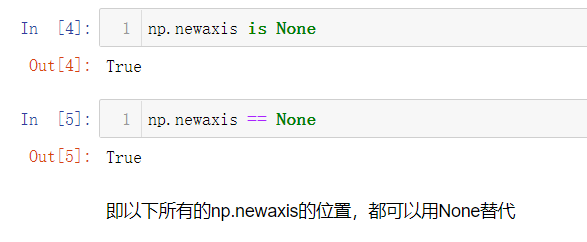
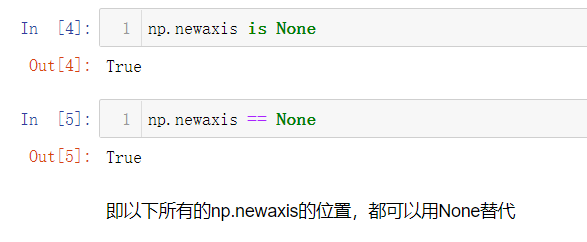

##### np.unsqueeze(a,axis = None)：
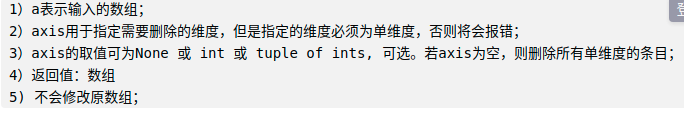
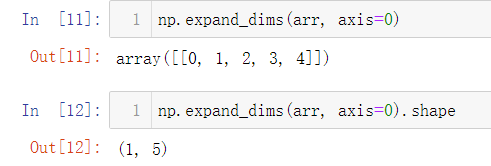
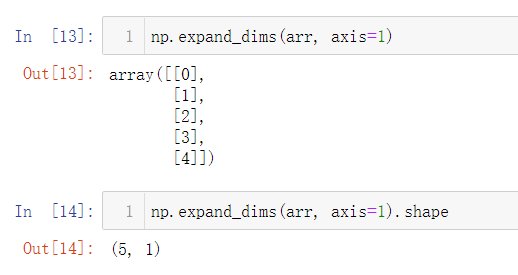

##### np.reshape(a, newshape)：方法，给一个维度设置为1完成升维

##### np.expand_dims(): np.expand_dims方法实现的效果，和np.newaxis关键字是一模一样的
给一维数组添加一个行维度
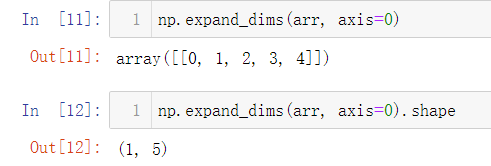
给一维数组添加一个列维度
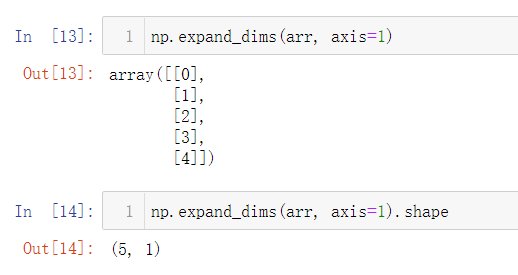

#### 删除维度方法